In [1]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("../tmp_outputs/all_jobs_combined_with_coords.csv")

# Ver las primeras filas
df.head()


title                         company location  \
0             Data Analyst             Loom Talent Limited   SN11AE   
1             Data Analyst                       Sagacity   EC1N2TD   
2             Data Analyst                   Exponential-e    E18EU   
3      Junior Data Analyst  Compass Group UK & Ireland Ltd  KT169BQ   
4  Data Analyst Apprentice                              QA  NE100HN   

    latitude  longitude                                        description  \
0  51.565233  -1.783232  Loom Talent are delighted to be leading the re...   
1  51.518068  -0.108520  Principal responsibilities will involve: Turn ...   
2  51.512912  -0.070196  Exponential-e Want to be part of a leading Bri...   
3  51.387089  -0.508339  Junior Data Analyst — Foodbuy Foodbuy is a lea...   
4  54.954713  -1.566209  About CMS:&nbsp; Commercial Maintenance Servic...   

   salary_min  salary_max                                       redirect_url  \
0     28000.0     30000.0  https://www.reed.co.uk/jobs/data-analyst/54842621   
1         NaN         NaN  https://www.reed.co.uk/jobs/data-analyst/54606079   
2         NaN         NaN  https://www.reed.co.uk/jobs/data-analyst/54798600   
3         NaN         NaN  https://www.reed.co.uk/jobs/junior-data-analys...   
4     25396.8     25396.8  https://www.reed.co.uk/jobs/data-analyst-appre...   

      created  search_query search_location source      date_downloaded  
0  14/04/2025  data analyst         England   reed  2025-04-22 18:37:03  
1  07/03/2025  data analyst         England   reed  2025-04-22 18:37:03  
2  07/04/2025  data analyst         England   reed  2025-04-22 18:37:03  
3  18/03/2025  data analyst         England   reed  2025-04-22 18:37:03  
4  11/04/2025  data analyst         England   reed  2025-04-22 18:37:03

In [2]:
# Forma y tipos de datos
df.info()

# Descripción estadística de columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3684 non-null   object 
 1   company          3682 non-null   object 
 2   location         3684 non-null   object 
 3   latitude         3676 non-null   float64
 4   longitude        3676 non-null   float64
 5   description      3684 non-null   object 
 6   salary_min       3169 non-null   float64
 7   salary_max       3169 non-null   float64
 8   redirect_url     3684 non-null   object 
 9   created          3684 non-null   object 
 10  search_query     3684 non-null   object 
 11  search_location  3684 non-null   object 
 12  source           3684 non-null   object 
 13  date_downloaded  3684 non-null   object 
dtypes: float64(4), object(10)
memory usage: 403.1+ KB


latitude    longitude     salary_min     salary_max
count  3676.000000  3676.000000    3169.000000    3169.000000
mean     52.618680    -2.188051   41247.251259   49578.210470
std       2.381262     7.241196   22979.402718   27451.052886
min     -33.019160  -112.359835       0.000000       0.000000
25%      51.507446    -2.998340   30000.000000   35000.000000
50%      51.879832    -1.313169   37371.710000   49111.260000
75%      53.520310    -0.127765   50000.000000   60000.000000
max      57.717033    27.899857  300000.000000  330000.000000

In [3]:
# Ver cuántos nulos hay por columna
df.isna().sum()

# Porcentaje de valores faltantes
(df.isna().mean() * 100).round(2).sort_values(ascending=False)


salary_min         13.98
salary_max         13.98
latitude            0.22
longitude           0.22
company             0.05
title               0.00
location            0.00
description         0.00
redirect_url        0.00
created             0.00
search_query        0.00
search_location     0.00
source              0.00
date_downloaded     0.00
dtype: float64

In [4]:
# ¿Cuántos registros tienen coordenadas?
has_coords = df.dropna(subset=["latitude", "longitude"])
print(f"Registros con coordenadas: {len(has_coords)} de {len(df)} totales")


Registros con coordenadas: 3676 de 3684 totales


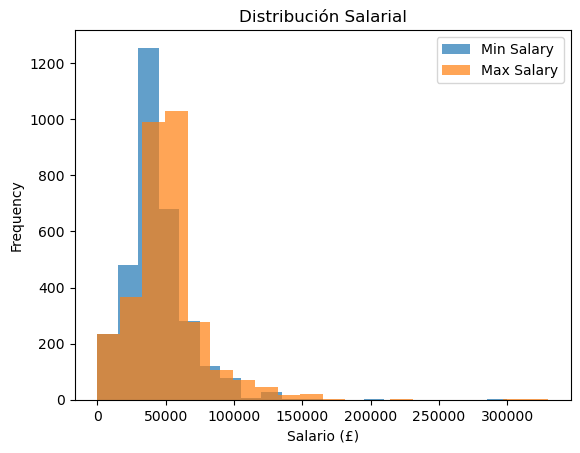

In [5]:
import matplotlib.pyplot as plt

df['salary_min'].dropna().plot.hist(bins=20, alpha=0.7, label='Min Salary')
df['salary_max'].dropna().plot.hist(bins=20, alpha=0.7, label='Max Salary')
plt.legend()
plt.title("Distribución Salarial")
plt.xlabel("Salario (£)")
plt.show()


C:\Users\44753\AppData\Local\Temp\ipykernel_28212\2902864206.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['created'] = pd.to_datetime(df['created'], errors='coerce')


<Axes: title={'center': 'Empleos publicados por día'}, xlabel='created'>

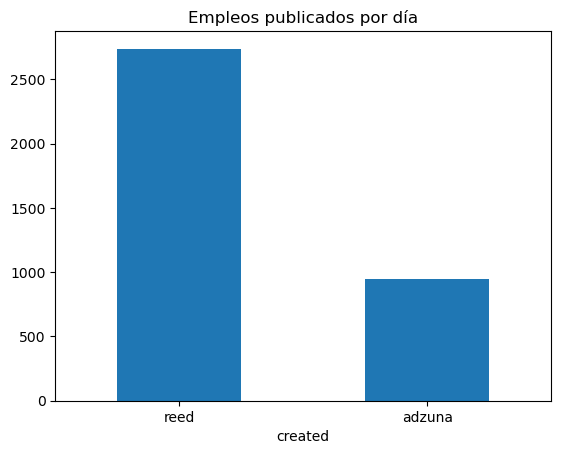

In [6]:
# Cantidad de registros por fuente (Reed / Adzuna)
df['source'].value_counts().plot(kind='bar', title="Cantidad de empleos por fuente")

# Fechas de publicación
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['created'].dt.date.value_counts().sort_index().plot(kind='line', title="Empleos publicados por día")


In [7]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Crear el mapa
m = folium.Map(location=[53.0, -1.6], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

# Iterar sobre los datos con coordenadas
for _, row in has_coords.iterrows():
    try:
        lat = float(row['latitude'])
        lon = float(row['longitude'])
        title = str(row['title']) if pd.notna(row['title']) else "Sin título"
        company = str(row['company']) if pd.notna(row['company']) else "Sin empresa"
        
        folium.Marker(
            location=[lat, lon],
            popup=f"{title} | {company}"
        ).add_to(marker_cluster)
    except Exception as e:
        print(f"❌ Error en fila: {e}")

# Mostrar en Jupyter
display(m)



<Axes: title={'center': 'Palabras más comunes en títulos'}, xlabel='word'>

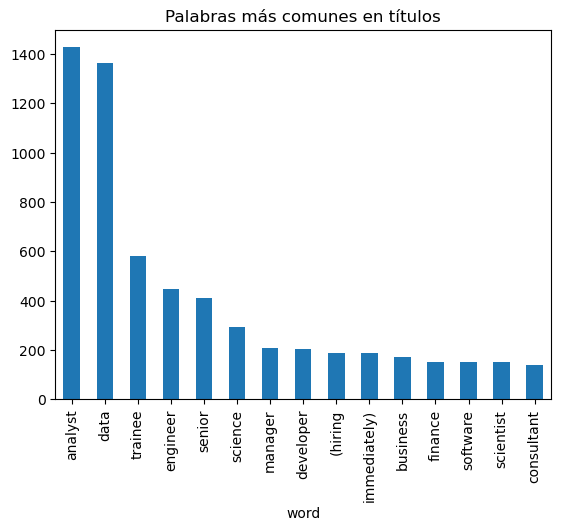

In [8]:
from collections import Counter

titles = df['title'].dropna().str.lower().str.split()
flat_words = [word for sublist in titles for word in sublist if len(word) > 2]
word_counts = Counter(flat_words).most_common(15)

pd.DataFrame(word_counts, columns=["word", "count"]).plot.bar(x='word', y='count', legend=False, title="Palabras más comunes en títulos")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44753\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Archivo guardado: frequent_words_over_1.csv


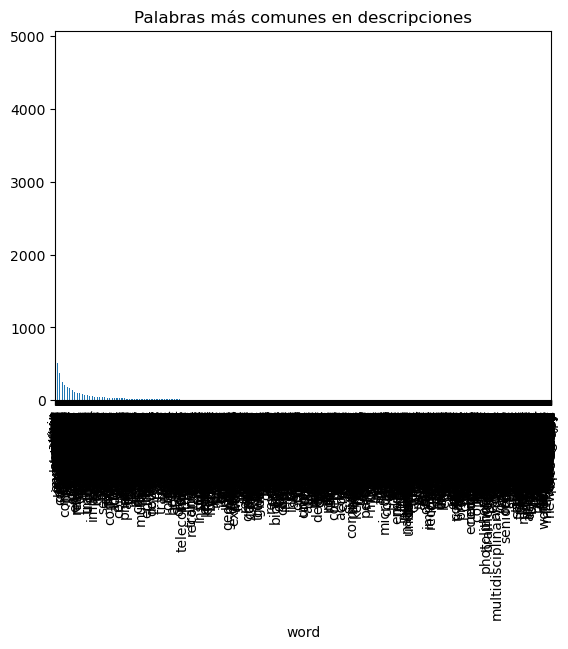

In [9]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords

# 📥 Descargar stopwords solo la primera vez
nltk.download('stopwords')

# 🧹 Crear conjunto de stopwords
stop_words = set(stopwords.words('english'))

# 📝 Dividir descripciones en palabras
titles = df['description'].dropna().str.lower().str.split()

# 🔄 Aplanar, limpiar y filtrar
flat_words = [
    word for sublist in titles for word in sublist
    if len(word) > 2 and word not in stop_words and word.isalpha()
]

# 📊 Contar las más comunes
word_counts = Counter(flat_words).most_common(30000)

# 📈 Mostrar gráfico
pd.DataFrame(word_counts, columns=["word", "count"]).plot.bar(
    x='word', y='count', legend=False, title="Palabras más comunes en descripciones"
)

# 🔎 Filtrar palabras con más de 10 apariciones
frequent_words = [(word, count) for word, count in word_counts if count > 1]
# 📝 Convertir a DataFrame
freq_df = pd.DataFrame(frequent_words, columns=["word", "count"])

# 💾 Exportar a CSV
freq_df.to_csv("frequent_words_over_1.csv", index=False)

print("✅ Archivo guardado: frequent_words_over_1.csv")

In [1]:
import pandas as pd
from collections import Counter
import re

# --- Step 1: Load your dataset ---
df = pd.read_csv("../tmp_outputs/all_jobs_combined_with_coords.csv")
descriptions = df['description'].dropna().str.lower()

# --- Step 2: Define your keywords list (500 total) ---
keywords = [
    "data analysis", "data analytics", "data science", "machine learning", "artificial intelligence",
    "deep learning", "neural networks", "natural language processing", "nlp", "supervised learning",
    "unsupervised learning", "data mining", "data wrangling", "regression analysis", "classification",
    "clustering", "forecasting", "predictive modeling", "big data", "data visualization",
    "statistical analysis", "exploratory data analysis", "eda", "feature engineering", "model evaluation",
    "data cleaning", "outlier detection", "data preprocessing", "time series", "sql", "python", "r",
    "sas", "excel", "power bi", "tableau", "looker", "google data studio", "matplotlib", "seaborn",
    "numpy", "pandas", "scikit-learn", "sklearn", "keras", "tensorflow", "pytorch", "hadoop", "spark",
    "aws", "azure", "gcp", "google cloud", "cloud computing", "api", "git", "github", "bitbucket",
    "jira", "agile", "scrum", "etl", "data engineer", "data analyst", "data scientist", "business analyst",
    "google data analytics", "ibm data science", "microsoft certified", "power query", "dax", "data lake",
    "data warehouse", "postgresql", "mysql", "oracle", "mongodb", "snowflake", "redshift", "airflow",
    "data pipelines", "data governance", "data catalog", "data stewardship", "metadata", "kpi", "okrs",
    "a/b testing", "hypothesis testing", "anova", "chi-square", "linear regression", "logistic regression",
    "random forest", "decision tree", "support vector machine", "svm", "xgboost", "lightgbm", "ensemble methods",
    "cross validation", "confusion matrix", "roc curve", "precision", "recall", "f1 score", "data ethics",
    "bias in ai", "explainable ai", "shap", "lime", "streamlit", "dash", "flask", "plotly", "data storytelling",
    "communication skills", "presentation skills", "stakeholder management", "critical thinking",
    "problem solving", "attention to detail", "time management", "teamwork", "self-motivated",
    "for loop", "if statement", "function", "data frame", "jupyter notebook", "google colab", "powerbi", "qgis",
    "arcgis", "geospatial analysis", "gis", "spatial data", "location intelligence", "data ethics",
    "grafana", "prometheus", "docker", "kubernetes", "ci/cd", "devops",
    "agile methodology", "scrum master", "kanban", "lean", "business intelligence", "data quality",
    "visual studio code", "pycharm", "api integration", "rest api", "graphql",
    "outlier analysis", "data profiling", "data lineage", "data architecture",
    "data modeling", "dimensional modeling", "star schema", "snowflake schema",
    "entity relationship diagram", "erd", "data dictionary", "data types",
    "data structures", "json", "xml", "csv", "parquet", "avro", "orc",
    "data formats", "data serialization", "data deserialization", "data compression",
    "gzip", "zip", "bzip2", "data encryption", "data security",
    "data privacy", "gdpr", "ccpa", "hipaa", "pci dss", "data breach",
    "data loss prevention", "datalake", "databricks", "snowflake", "bigquery",
    "redshift", "data mesh", "data fabric", "data virtualization",
    "data integration", "data federation", "data replication", "data synchronization",
    "data migration", "data transformation", "data cleansing", "data enrichment",
    "data augmentation",
    "data sampling", "data stratification", "data balancing",
    "data oversampling", "data undersampling",
    "data augmentation", "data synthesis",
    "data generation", "data simulation",
    "data anonymization", "data pseudonymization",
    "lambda",  "lambda function", "map", "filter", "reduce", "data visualization",
    "data storytelling", "data journalism",
    "data art", "data design", "data aesthetics",
    "data ethics", "data responsibility", "postgres",
    "sql server", "mysql", "mariadb", "sqlite","postgresql",
    "cassandra", "redis", "neo4j", "graph database","mongodb",
    "document database", "key-value store","mongo","postgis",
    "spatial database", "geospatial database", "junior", "senior", "apprentice",
    "intern", "entry level", "mid level", "senior level", "lead", "principal","aprenticeship",
    "graduate", "fellowship", "trainee", "junior data analyst", "senior data analyst",]

# --- Step 3: Count occurrences ---
keyword_counts = Counter()

for desc in descriptions:
    for keyword in keywords:
        # Count keyword occurrences using regex for whole words and phrases
        matches = re.findall(r'\b' + re.escape(keyword) + r'\b', desc)
        if matches:
            keyword_counts[keyword] += len(matches)

# --- Step 4: Export to CSV ---
counts_df = pd.DataFrame(keyword_counts.items(), columns=["keyword", "count"])
counts_df = counts_df.sort_values(by="count", ascending=False)
counts_df.to_csv("keyword_mentions.csv", index=False)

print(f"✅ Exported {len(counts_df)} keyword frequencies to 'keyword_mentions.csv'")



✅ Exported 113 keyword frequencies to 'keyword_mentions.csv'


In [11]:
import re
import pandas as pd

# Example: Load your DataFrame
# df = pd.read_csv("your_jobs_file.csv")

# --- Define expanded keyword patterns ---
apprentice_terms = r"\b(apprentice|apprenticeship|intern(ship)?|trainee)\b"
graduate_terms = r"\b(graduate|entry[- ]level|early[- ]career|recent[- ]graduate)\b"
junior_terms = r"\b(junior|jr|early[- ]level|entry[- ]position)\b"
senior_terms = r"\b(senior|sr|lead|principal|head|expert|specialist|manager|architect|chief|consultant|director)\b"
mid_terms = r"\b(mid[- ]?level|associate|intermediate|experienced|analyst)\b"

# --- Classifier function ---
def classify_job_level(row):
    # Combine and lower case title + description
    title = str(row.get('title', '')).lower()
    description = str(row.get('description', '')).lower()
    text = f"{title} {description}"

    # Check with broader matching first
    if re.search(apprentice_terms, text):
        return "Apprentice"
    elif re.search(graduate_terms, text):
        return "Graduate"
    elif re.search(junior_terms, text):
        return "Junior"
    elif re.search(senior_terms, text):
        return "Senior"
    elif re.search(mid_terms, text):
        return "Mid-level"
    
    # Fallback: try title-only
    if re.search(apprentice_terms, title):
        return "Apprentice"
    elif re.search(graduate_terms, title):
        return "Graduate"
    elif re.search(junior_terms, title):
        return "Junior"
    elif re.search(senior_terms, title):
        return "Senior"
    elif re.search(mid_terms, title):
        return "Mid-level"
    
    return "Unknown"

# --- Apply function to your DataFrame ---
df['job_level'] = df.apply(classify_job_level, axis=1)

# --- View results ---
print(df['job_level'].value_counts())

# Optional: Save to CSV
df.to_csv("jobs_with_levels.csv", index=False)


job_level
Senior        1383
Mid-level      819
Apprentice     645
Unknown        602
Graduate       183
Junior          52
Name: count, dtype: int64


C:\Users\44753\AppData\Local\Temp\ipykernel_28212\1828847705.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\44753\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


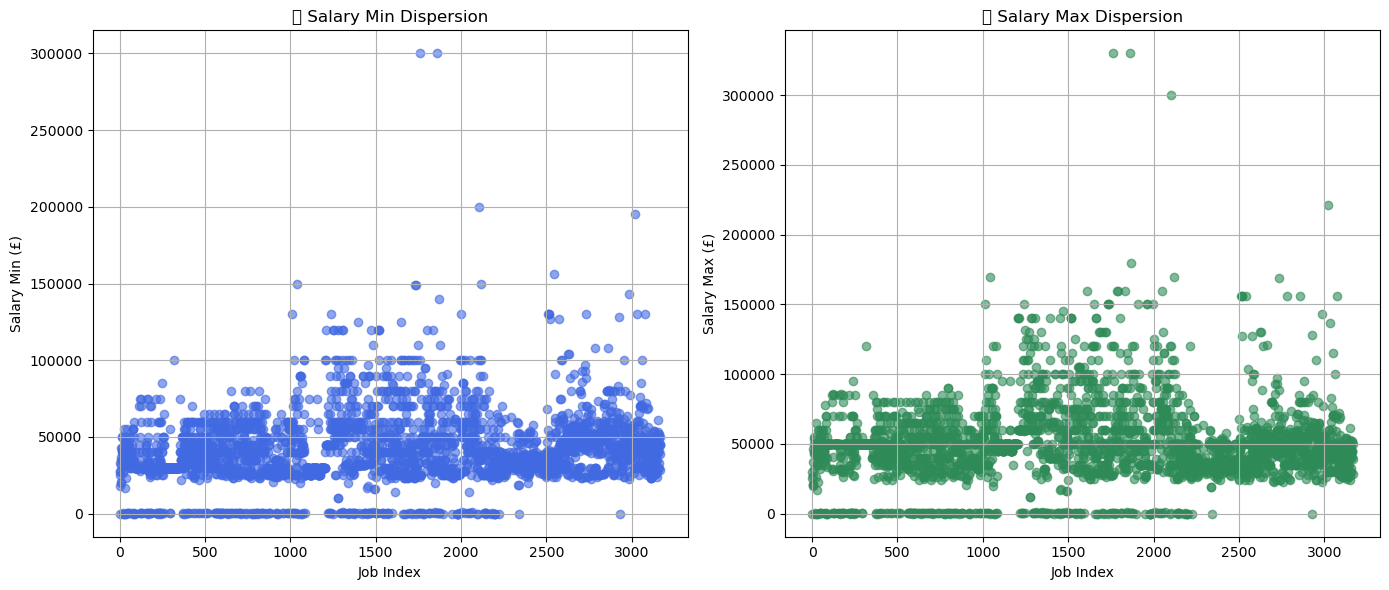

In [12]:
import matplotlib.pyplot as plt

# Filter only real (non-predicted) salary values
real_salaries = df[df['salary_min'].notna() & df['salary_max'].notna()]

# Reset index for plotting
real_salaries = real_salaries.reset_index(drop=True)

# --- Create subplots for salary_min and salary_max ---
plt.figure(figsize=(14, 6))

# Salary Min Scatter
plt.subplot(1, 2, 1)
plt.scatter(real_salaries.index, real_salaries['salary_min'], alpha=0.6, color='royalblue')
plt.title("💰 Salary Min Dispersion")
plt.xlabel("Job Index")
plt.ylabel("Salary Min (£)")
plt.grid(True)

# Salary Max Scatter
plt.subplot(1, 2, 2)
plt.scatter(real_salaries.index, real_salaries['salary_max'], alpha=0.6, color='seagreen')
plt.title("💰 Salary Max Dispersion")
plt.xlabel("Job Index")
plt.ylabel("Salary Max (£)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# 🧹 Step 1: Filter only rows with known salaries (not predicted)
real_salaries = df[df['salary_min'].notna() & df['salary_max'].notna()]

# --- Function to flag outliers using IQR ---
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# --- Step 2: Apply to both columns ---
real_salaries['min_outlier'] = detect_outliers_iqr(real_salaries['salary_min'])
real_salaries['max_outlier'] = detect_outliers_iqr(real_salaries['salary_max'])

# --- Step 3: View or export ---
outliers_df = real_salaries[(real_salaries['min_outlier']) | (real_salaries['max_outlier'])]
print(f"🚨 Found {len(outliers_df)} outlier job entries based on IQR.")

# Optional: Save to file
outliers_df.to_csv("../tmp_outputs/salary_outliers.csv", index=False)
print("✅ Outliers exported to 'tmp_outputs/salary_outliers.csv'")


🚨 Found 191 outlier job entries based on IQR.
✅ Outliers exported to 'tmp_outputs/salary_outliers.csv'


C:\Users\44753\AppData\Local\Temp\ipykernel_28212\114640704.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_salaries['min_outlier'] = detect_outliers_iqr(real_salaries['salary_min'])
C:\Users\44753\AppData\Local\Temp\ipykernel_28212\114640704.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_salaries['max_outlier'] = detect_outliers_iqr(real_salaries['salary_max'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # convert text to numeric features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- Step 1: Load data ---
# Replace this with your actual file path if needed
df = pd.read_csv("jobs_with_levels.csv")

# --- Step 2: Prepare features ---
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['text'] = df['title'] + ' ' + df['description']

# --- Step 3: Prepare TF-IDF features ---
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['text'])

# --- Step 4: Predict salary_min ---
df_min_train = df[df['salary_min'].notna()]
df_min_missing = df[df['salary_min'].isna()]

X_min_train = tfidf.transform(df_min_train['text'])
y_min_train = df_min_train['salary_min']

model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_min.fit(X_min_train, y_min_train)

# Evaluate
X_min_eval, X_min_test, y_min_eval, y_min_test = train_test_split(X_min_train, y_min_train, test_size=0.2, random_state=42)
y_min_pred = model_min.predict(X_min_test)
mae_min = mean_absolute_error(y_min_test, y_min_pred)
print(f"📉 MAE (salary_min): £{mae_min:.2f}")

# Predict missing
df.loc[df['salary_min'].isna(), 'predicted_salary_min'] = model_min.predict(tfidf.transform(df_min_missing['text']))

# --- Step 5: Predict salary_max ---
df_max_train = df[df['salary_max'].notna()]
df_max_missing = df[df['salary_max'].isna()]

X_max_train = tfidf.transform(df_max_train['text'])
y_max_train = df_max_train['salary_max']

model_max = RandomForestRegressor(n_estimators=100, random_state=42)
model_max.fit(X_max_train, y_max_train)

# Evaluate
X_max_eval, X_max_test, y_max_eval, y_max_test = train_test_split(X_max_train, y_max_train, test_size=0.2, random_state=42)
y_max_pred = model_max.predict(X_max_test)
mae_max = mean_absolute_error(y_max_test, y_max_pred)
print(f"📉 MAE (salary_max): £{mae_max:.2f}")

# Predict missing
df.loc[df['salary_max'].isna(), 'predicted_salary_max'] = model_max.predict(tfidf.transform(df_max_missing['text']))

# --- Step 6: Save result ---
df.to_csv("../tmp_outputs/jobs_with_predicted_salaries.csv", index=False)
print("✅ Results saved to 'tmp_outputs/jobs_with_predicted_salaries.csv'")


📉 MAE (salary_min): £2430.05
📉 MAE (salary_max): £2902.49
✅ Results saved to 'tmp_outputs/jobs_with_predicted_salaries.csv'


🔍 1. Distribución del error

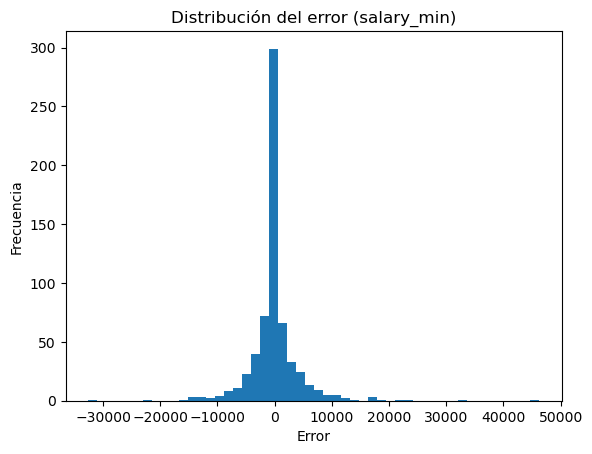

In [15]:
import matplotlib.pyplot as plt

# Para salary_min
errors_min = y_min_test - y_min_pred
plt.hist(errors_min, bins=50)
plt.title("Distribución del error (salary_min)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


📈 2. Predicción vs Valor real

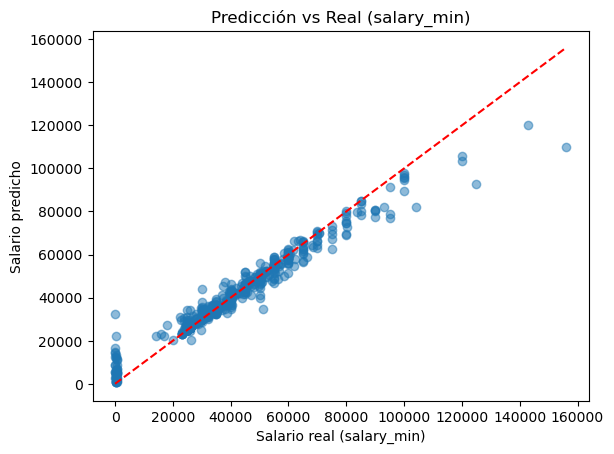

In [16]:
plt.scatter(y_min_test, y_min_pred, alpha=0.5)
plt.plot([y_min_test.min(), y_min_test.max()], [y_min_test.min(), y_min_test.max()], 'r--')
plt.xlabel("Salario real (salary_min)")
plt.ylabel("Salario predicho")
plt.title("Predicción vs Real (salary_min)")
plt.show()


🧠 3. Importancia de características (palabras más influyentes)

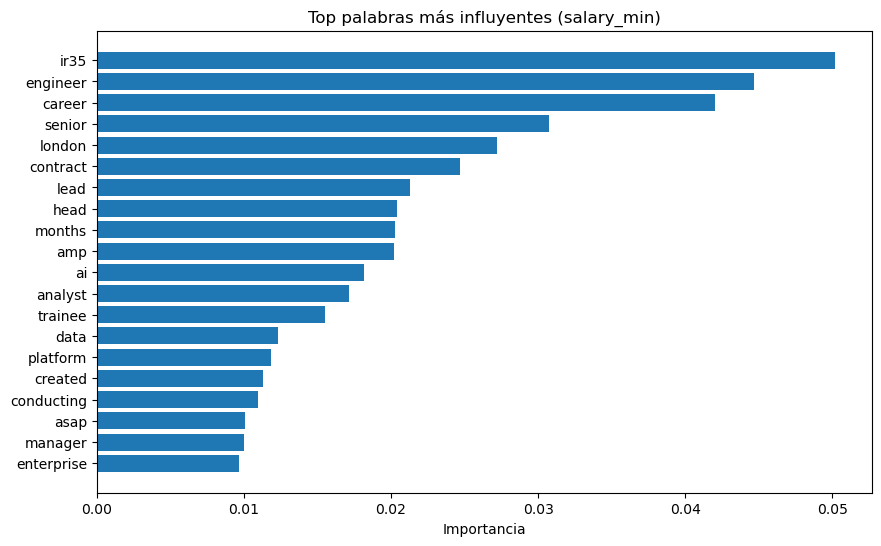

In [17]:
feature_names = tfidf.get_feature_names_out()
importances = model_min.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 más importantes

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importancia')
plt.title('Top palabras más influyentes (salary_min)')
plt.show()


📊 4. Resumen rápido por percentiles


In [18]:
abs_errors = np.abs(y_min_test - y_min_pred)
print("Resumen de errores absolutos:")
print(f"MAE: {mae_min:.2f}")
print(f"Mediana: {np.median(abs_errors):.2f}")
print(f"Percentil 90: {np.percentile(abs_errors, 90):.2f}")


Resumen de errores absolutos:
MAE: 2430.05
Mediana: 977.27
Percentil 90: 6222.25


In [19]:
# calculate the average of the predicted salaries
df['predicted_salary_avg'] = df[['predicted_salary_min', 'predicted_salary_max']].mean(axis=1)
#print the average of the predicted salaries
print(df['predicted_salary_avg'].describe())

count      515.000000
mean     44949.726053
std      13727.501251
min       2339.503250
25%      38816.528312
50%      43886.235454
75%      52342.454700
max      81838.252408
Name: predicted_salary_avg, dtype: float64


In [20]:
# print the average of the non predicted salaries
print(df[['salary_min', 'salary_max']].mean(axis=1).describe())

count      3169.000000
mean      45412.730865
std       24778.494423
min           0.000000
25%       33250.000000
50%       40000.000000
75%       55000.000000
max      315000.000000
dtype: float64


### 📉 Interpretación

| MAE Entrenamiento | MAE Test | ¿Overfitting?                             |
|-------------------|----------|-------------------------------------------|
| Bajo              | Bajo     | No, el modelo generaliza bien ✅          |
| Bajo              | Alto     | Sí, overfitting 😬                        |
| Alto              | Alto     | Modelo muy simple (underfitting) 😐       |


In [21]:
# Error en entrenamiento
y_min_train_pred = model_min.predict(X_min_train)
mae_min_train = mean_absolute_error(y_min_train, y_min_train_pred)
print(f"📊 MAE en entrenamiento: £{mae_min_train:.2f}")

# Ya tienes esto en tu código para test
print(f"📉 MAE en test: £{mae_min:.2f}")


📊 MAE en entrenamiento: £2749.30
📉 MAE en test: £2430.05


| Métrica                | ¿Qué mide?                                               | ¿Cuándo usarla?                                        | Ventajas / Desventajas                                               |
|------------------------|----------------------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------------|
| **MAE** (Mean Absolute Error) | Error promedio en unidades reales (£)                    | Siempre útil; fácil de interpretar                     | No penaliza mucho errores grandes                                      |
| **MSE** (Mean Squared Error)  | Promedio de los errores al cuadrado                      | Para modelos que deben evitar errores grandes          | Penaliza mucho los errores grandes                                     |
| **RMSE** (Root MSE)           | Raíz cuadrada del MSE (en mismas unidades que el target) | Cuando querés interpretar el error "típico"            | Más interpretable que el MSE                                           |
| **R²** (R-cuadrado)           | % de varianza explicada por el modelo                   | Para ver qué tan bien explica el modelo la variabilidad | Puede ser engañoso si los datos están sesgados o con poco rango        |


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_min_test, y_min_pred)
mse = mean_squared_error(y_min_test, y_min_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_min_test, y_min_pred)

print(f"MAE: £{mae:.2f}")
print(f"MSE: £{mse:.2f}")
print(f"RMSE: £{rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: £2430.05
MSE: £22801159.48
RMSE: £4775.06
R²: 0.948
